In [1]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here
train = pd.read_csv('train.csv')
print(train.head(5))
print(train.shape)
print(train.info())
print(train.describe)
# Code ends here.

     Id  age  sex    bmi  children  smoker  region     charges  insuranceclaim
0  1182   25    0  30.30         0       0       3   2632.9920               1
1   990   26    0  19.80         1       0       3   3378.9100               0
2   123   44    1  31.35         1       1       0  39556.4945               1
3   184   44    1  30.69         2       0       2   7731.4271               0
4  1167   29    0  24.60         2       0       3   4529.4770               0
(1070, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   age             1070 non-null   int64  
 2   sex             1070 non-null   int64  
 3   bmi             1070 non-null   float64
 4   children        1070 non-null   int64  
 5   smoker          1070 non-null   int64  
 6   region          1070 non-null   int64  
 7   

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

In [3]:
# Code starts here
# choose categorical and continuous features from data

categorical_columns = [c for c in train.columns 
                       if train[c].dtype.name == 'object']
numerical_columns = [c for c in train.columns 
                     if train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

# Code ends here.

categorical_columns: []
numerical_columns: ['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'insuranceclaim']


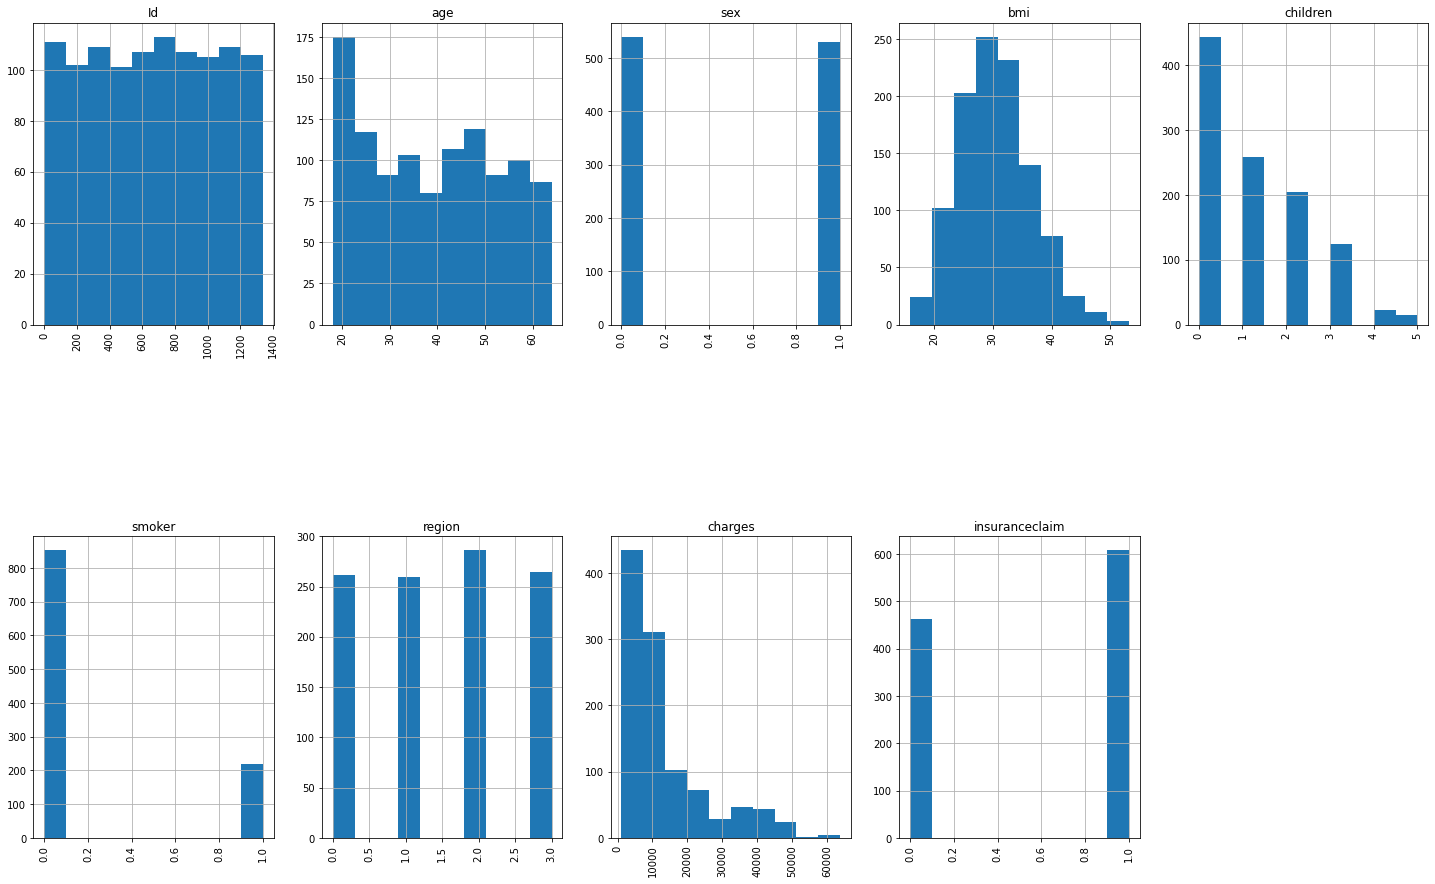

In [4]:
# Code starts here

fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(train.shape[1]) / cols)
for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Code ends here.

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [5]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =16)

In [6]:
model = LogisticRegression()
# fit the model
model.fit(X_train,y_train)

# make predictions
y_pred = model.predict(X_test)

print('ROC_AUC_SCORE is {}'.format(roc_auc_score(y_test,y_pred)))


ROC_AUC_SCORE is 0.8060961521372079


In [7]:
params = {'C':[0.2,0.5,3,5]}

grid_search = GridSearchCV(estimator=model, param_grid=params)
grid_search.fit(X_train,y_train)
y_pred_proba = grid_search.predict(X_test)
print('ROC_AUC_SCORE is {}'.format(roc_auc_score(y_test,y_pred_proba)))

ROC_AUC_SCORE is 0.8019639207322492


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [8]:
# Code starts here

# Read the test data
test = pd.read_csv("test.csv")

# Storing the id from the test file
Id = test['Id']

# Predict on the test data
y_pred_test = grid_search.predict(test)

final_submission = pd.DataFrame({'Id':Id,'insuranceclaim':y_pred_test})
final_submission = final_submission.astype(int)

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

# Code ends here.